In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('nyccleaned.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace=True)

In [6]:
df = df[df['total_amount']>0]

In [7]:
df.shape 

(1000926, 48)

Analysis

In [8]:
df=df[(df["PickupBorough"]!="Unknown")&(df["DropoffBorough"]!="Unknown")]
df=df[(df["PickupBorough"]!="EWR")&(df["DropoffBorough"]!="Unknown")]

In [9]:
df.shape



(987072, 48)

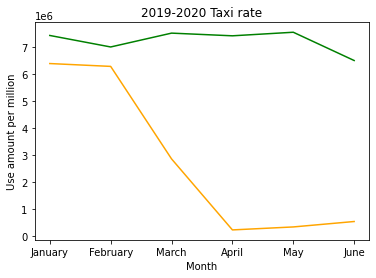

In [10]:
year2019=[7445792,7019375,7532545,7433139,7565261,6517077]
year2020=[6405008,6299354,2870962,237994,348372,549704]
month=["January","February","March","April","May","June"]
plt.xlabel('Month')
plt.ylabel('Use amount per million')
plt.title('2019-2020 Taxi rate')

plt.plot(month,year2019,color="g")
plt.plot(month,year2020,color="orange")
plt.show()


## Analyzing total trips by Borough

In [11]:
Borough_count=df.groupby(["PickupBorough"])["RatecodeID"].count().sort_values()

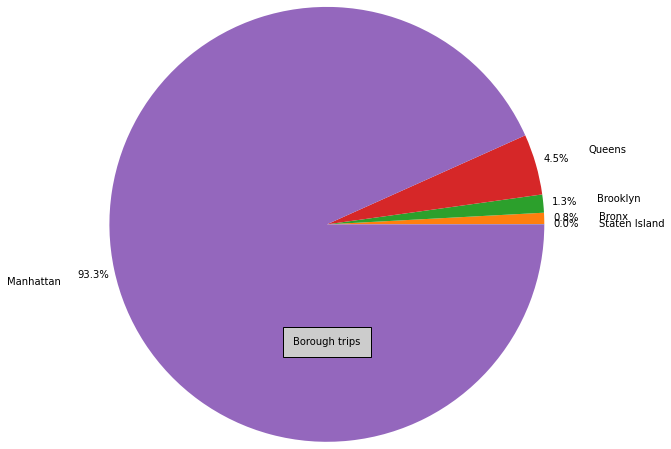

<bound method NDFrame.head of PickupBorough
Staten Island       234
Bronx              8201
Brooklyn          13272
Queens            44558
Manhattan        920807
Name: RatecodeID, dtype: int64>


In [12]:
plt.pie(Borough_count,labels=Borough_count.index, radius = 2.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.xlabel('Borough trips',bbox={'facecolor':'0.8', 'pad':10})
plt.show()
print(Borough_count.head)

It is no suprise that Manhattan has the highest percent from bad parking,smaller area overall and the quickness of the environment.The real focus is on the individual aspect of each part of this chart.

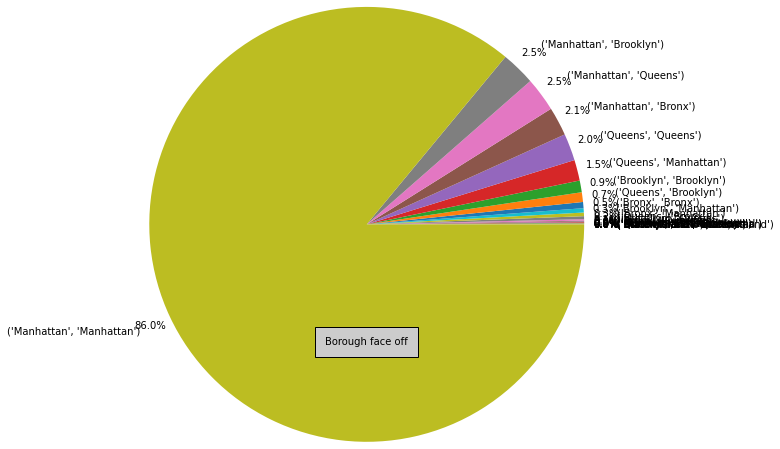

In [13]:
Borough_face_off=df.groupby(["PickupBorough","DropoffBorough"])["RatecodeID"].count().sort_values()
plt.pie(Borough_face_off,labels=Borough_face_off.index, radius = 2.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.15)
plt.xlabel('Borough face off',bbox={'facecolor':'0.8', 'pad':10})
plt.show()

Interesting that the biggest part of this pie chart is Manhattan.That make sense with my comment above and more to that with Coronavirus no one wants to take the train where there a higher chance of getting sick

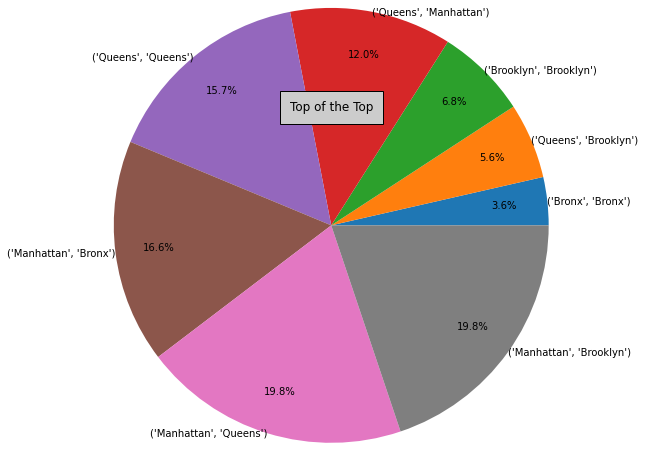

PickupBorough  DropoffBorough
Bronx          Bronx              4518
Queens         Brooklyn           7102
Brooklyn       Brooklyn           8598
Queens         Manhattan         15222
               Queens            19842
Name: RatecodeID, dtype: int64


In [14]:

Borough_face_off_pickup=df.groupby(["PickupBorough","DropoffBorough"])["RatecodeID"].count().sort_values()
Borough_face_off_pickup.drop(Borough_face_off_pickup.tail(1).index,inplace=True)
Borough_face_off_pickup.drop(Borough_face_off_pickup.head(20).index,inplace=True)

plt.pie(Borough_face_off_pickup,labels=Borough_face_off_pickup.index, radius = 2.5,autopct='%1.1f%%',pctdistance=.8,labeldistance=1)
plt.title('Top of the Top',bbox={'facecolor':'0.8', 'pad':10})
plt.show()

print(Borough_face_off_pickup.head(5))


Removing the biggest quantity(Manhattan to Manhattan) and cleaning up the small percent that only pull attention from the main focus we can now see taxis within the same borough has the highest percent .

In [15]:
df=df[(df["PickupBorough"]!="Unknown")]
df=df[(df["PickupBorough"]!="EWR")]

Manhattan=df[(df["PickupBorough"]=="Manhattan")&(df["DropoffBorough"]=="Manhattan")]
Bronx=df[(df["PickupBorough"]=="Bronx")&(df["DropoffBorough"]=="Bronx")]
Queens=df[(df["PickupBorough"]=="Queens")&(df["DropoffBorough"]=="Queens")]
Brooklyn=df[(df["PickupBorough"]=="Brooklyn")&(df["DropoffBorough"]=="Brooklyn")]
Staten_Island=df[(df["PickupBorough"]=="Staten Island")&(df["DropoffBorough"]=="Staten Island")]





WithinBronx=Bronx.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinQueens=Queens.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinBrooklyn=Brooklyn.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinStaten_Island=Staten_Island.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinManhattan=Manhattan.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()

WithinBronxmean=Bronx.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinQueensmean=Queens.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinBrooklynmean=Brooklyn.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinStaten_Islandmean=Staten_Island.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinManhattanmean=Manhattan.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")

<ipython-input-15-db3a6ca286a3>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinBronxmean=Bronx.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-15-db3a6ca286a3>:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinQueensmean=Queens.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-15-db3a6ca286a3>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinBrooklynmean=Brooklyn.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-15-db3a6ca286a3>:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tupl

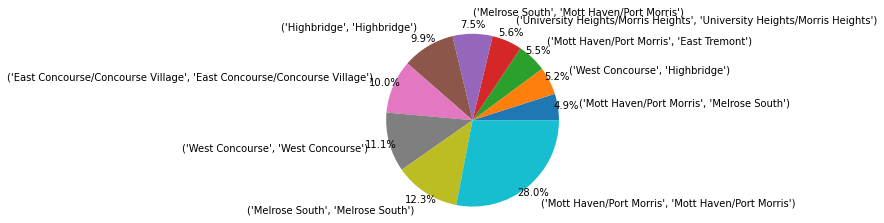

PickupZone                         DropoffZone                      
Mott Haven/Port Morris             Melrose South                         35
West Concourse                     Highbridge                            37
Mott Haven/Port Morris             East Tremont                          39
University Heights/Morris Heights  University Heights/Morris Heights     40
Melrose South                      Mott Haven/Port Morris                53
Highbridge                         Highbridge                            70
East Concourse/Concourse Village   East Concourse/Concourse Village      71
West Concourse                     West Concourse                        79
Melrose South                      Melrose South                         87
Mott Haven/Port Morris             Mott Haven/Port Morris               199
Name: RatecodeID, dtype: int64


<ipython-input-16-572c9e276893>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


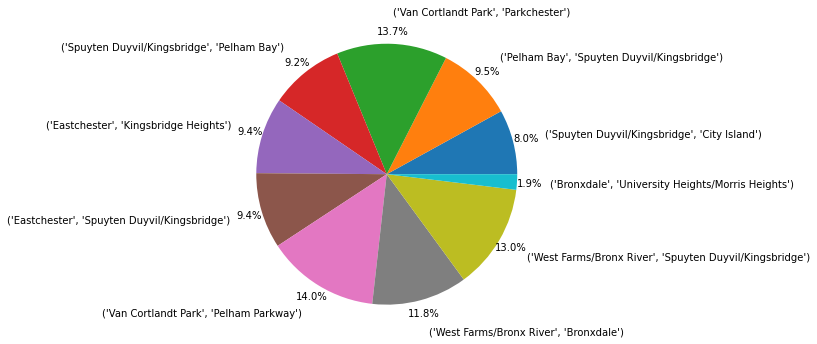

                                                              total_amount  \
PickupZone                 DropoffZone                                       
Spuyten Duyvil/Kingsbridge City Island                           36.800000   
Pelham Bay                 Spuyten Duyvil/Kingsbridge            43.550000   
Van Cortlandt Park         Parkchester                           62.910000   
Spuyten Duyvil/Kingsbridge Pelham Bay                            42.383333   
Eastchester                Kingsbridge Heights                   43.383333   
                           Spuyten Duyvil/Kingsbridge            43.050000   
Van Cortlandt Park         Pelham Parkway                        64.170000   
West Farms/Bronx River     Bronxdale                             54.300000   
                           Spuyten Duyvil/Kingsbridge            59.850000   
Bronxdale                  University Heights/Morris Heights      8.800000   

                                                              t

In [16]:
fig = plt.figure()


WithinBronxtopten=WithinBronx.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBronxtopten,labels=WithinBronxtopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()
print(WithinBronxtopten)

WithinBronxtoptenmean=WithinBronxmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBronxtoptenmean["total_amount"],labels=WithinBronxtoptenmean.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()
print(WithinBronxtoptenmean)

Looking at the following,we see that if driver stay in these area they can monopolies the area and earn the most money by trip by increasing the frequence .

PickupZone                         DropoffZone                         count                          
Highbridge                         Highbridge                            71
East Concourse/Concourse Village   East Concourse/Concourse Village      74
West Concourse                     West Concourse                        84
Melrose South                      Melrose South                         90
Mott Haven/Port Morris             Mott Haven/Port Morris               205


Compare to the other location,the average for these trip earned more for driving less.

PickupZone                  DropoffZone        total_amount   miles             
Van Cortlandt Park         Parkchester          62.910000      13.64
Van Cortlandt Park         Pelham Parkway       64.170000      14.50


With this,we notice that Bronxdale to University Heights Morris Heights has a average cost of  8.800000  but has 
a distance of 23.40 miles making you believe that there this trip is low but if you refer to the pie chart you notice the it 
only 1.3% meaning the quantity of taxi taking that fare it low and this can be seem as an outliner.

PickupZone      DropoffZone                       total_amount   miles 
Bronxdale    University Heights/Morris Heights      8.800000  23.430000   

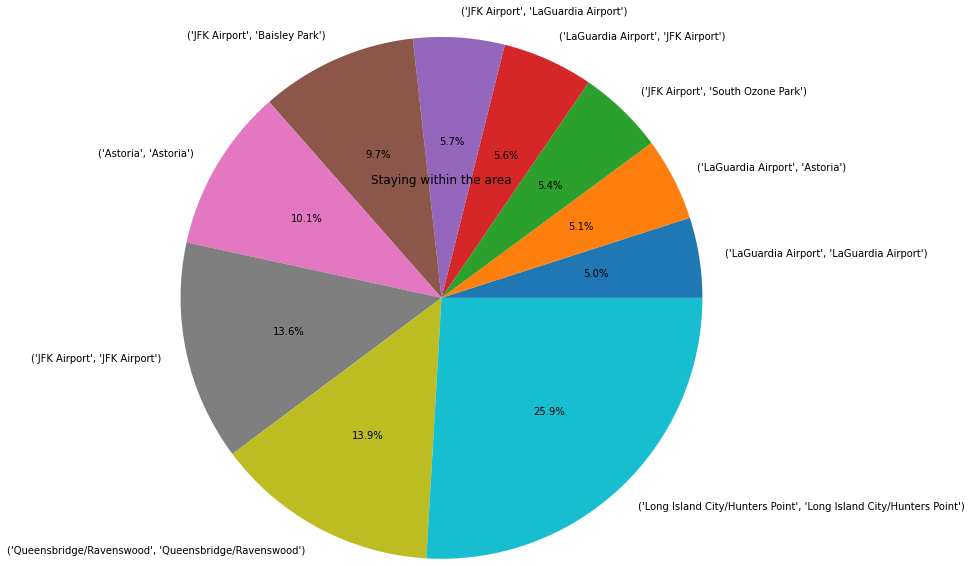

PickupZone                      DropoffZone                   
LaGuardia Airport               LaGuardia Airport                  244
                                Astoria                            253
JFK Airport                     South Ozone Park                   263
LaGuardia Airport               JFK Airport                        277
JFK Airport                     LaGuardia Airport                  278
                                Baisley Park                       478
Astoria                         Astoria                            497
JFK Airport                     JFK Airport                        669
Queensbridge/Ravenswood         Queensbridge/Ravenswood            682
Long Island City/Hunters Point  Long Island City/Hunters Point    1274
Name: RatecodeID, dtype: int64


<ipython-input-17-8e0de1e83ba5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


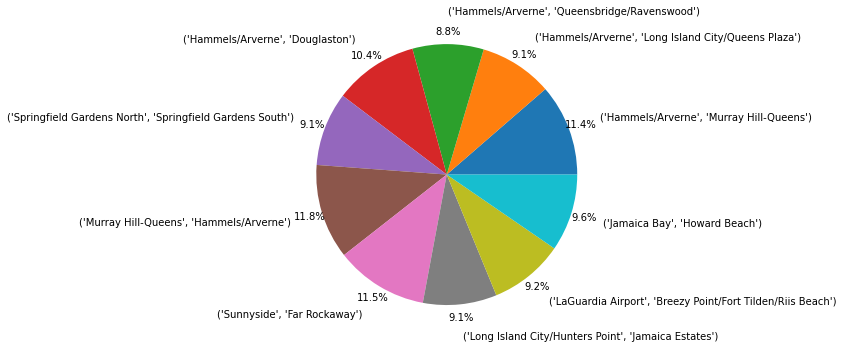

                                                                    total_amount  \
PickupZone                     DropoffZone                                         
Hammels/Arverne                Murray Hill-Queens                        92.6900   
                               Long Island City/Queens Plaza             73.8925   
                               Queensbridge/Ravenswood                   71.8400   
                               Douglaston                                85.0900   
Springfield Gardens North      Springfield Gardens South                 74.5500   
Murray Hill-Queens             Hammels/Arverne                           95.8400   
Sunnyside                      Far Rockaway                              93.6400   
Long Island City/Hunters Point Jamaica Estates                           74.5500   
LaGuardia Airport              Breezy Point/Fort Tilden/Riis Beach       75.1950   
Jamaica Bay                    Howard Beach                              78.

In [17]:
WithinQueensTopTen=WithinQueens.tail(10)
plt.pie(WithinQueensTopTen,labels=WithinQueensTopTen.index, radius = 3,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()

print(WithinQueensTopTen)


WithinQueensmeantopten=WithinQueensmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinQueensmeantopten["total_amount"],labels=WithinQueensmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinQueensmeantopten)

The following are the main ones  taxi driver should focus.The the interesting thing is that  LaGuardia Airport and JFk are the main one not from coming from other regions but to each other.
PickupZone                      DropoffZone                       count                      
Astoria                         Astoria                            514
JFK Airport                     JFK Airport                        691
Queensbridge/Ravenswood         Queensbridge/Ravenswood            927
Long Island City/Hunters Point  Long Island City/Hunters Point    1290

Taking trip from the top three earn you close to $100 for a about an hour ride.Jamaica Bay to Howard Beach should be avoided as the money earn is not worth for the amount of driving.
PickupZone                      DropoffZone              Total          trip 
Hammels/Arverne                Murray Hill-Queens        92.6900        23.536667 
Murray Hill-Queens             Hammels/Arverne           95.8400        25.810000
Sunnyside                      Far Rockaway              93.6400        26.070000
Jamaica Bay                    Howard Beach              78.0500        42.910000  

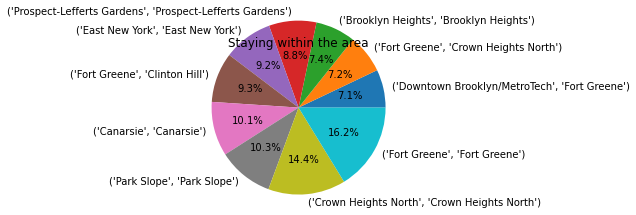

PickupZone                   DropoffZone              
Downtown Brooklyn/MetroTech  Fort Greene                   61
Fort Greene                  Crown Heights North           62
Brooklyn Heights             Brooklyn Heights              64
Prospect-Lefferts Gardens    Prospect-Lefferts Gardens     76
East New York                East New York                 79
Fort Greene                  Clinton Hill                  80
Canarsie                     Canarsie                      87
Park Slope                   Park Slope                    89
Crown Heights North          Crown Heights North          124
Fort Greene                  Fort Greene                  140
Name: RatecodeID, dtype: int64


<ipython-input-18-bc3eef302dee>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


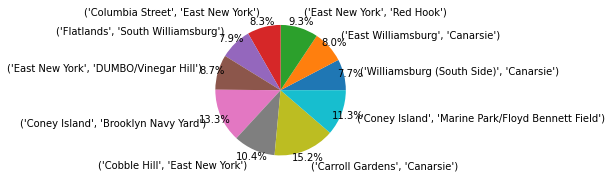

                                                           total_amount  \
PickupZone                DropoffZone                                     
Williamsburg (South Side) Canarsie                            56.050000   
East Williamsburg         Canarsie                            58.050000   
East New York             Red Hook                            68.005714   
Columbia Street           East New York                       60.550000   
Flatlands                 South Williamsburg                  57.800000   
East New York             DUMBO/Vinegar Hill                  63.300000   
Coney Island              Brooklyn Navy Yard                  96.800000   
Cobble Hill               East New York                       75.550000   
Carroll Gardens           Canarsie                           110.465000   
Coney Island              Marine Park/Floyd Bennett Field     82.550000   

                                                           trip_distance  
PickupZone              

In [18]:
WithinBrooklynTopTen=WithinBrooklyn.tail(10)
plt.figure(figsize=(3,2))
plt.pie(WithinBrooklynTopTen,labels=WithinBrooklynTopTen.index, radius = 2,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
print(WithinBrooklynTopTen)

plt.figure(figsize=(3,2))
WithinBrooklynmeantopten=WithinBrooklynmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBrooklynmeantopten["total_amount"],labels=WithinBrooklynmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinBrooklynmeantopten)

The following are the main ones  taxi driver should focus.
PickupZone                      DropoffZone                       count 
Prospect-Lefferts Gardens       Prospect-Lefferts Gardens         81
Canarsie                        Canarsie                          90
Park Slope                      Park Slope                        91
 Crown Heights North         Crown Heights North                  131
Fort Greene                     Fort Greene                        148


The below trip is the winner among all the boroughs as trip. 110 for one trip and make up for the shorter manhattan trips.
PickupZone             DropoffZone              Total          trip 
Carroll Gardens         Canarsie               110.465000  24.110000


Below looks like a other outliner.The rate doesn't match the rest and it only 1.2% of the pie
PickupZone             DropoffZone              Total          trip 
Coney Island              Brooklyn Navy Yard      9.680000   23.090000

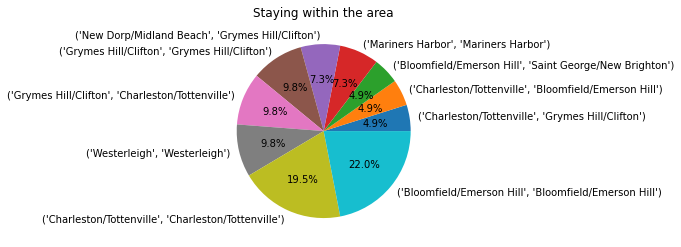

<ipython-input-19-41d68a46756d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


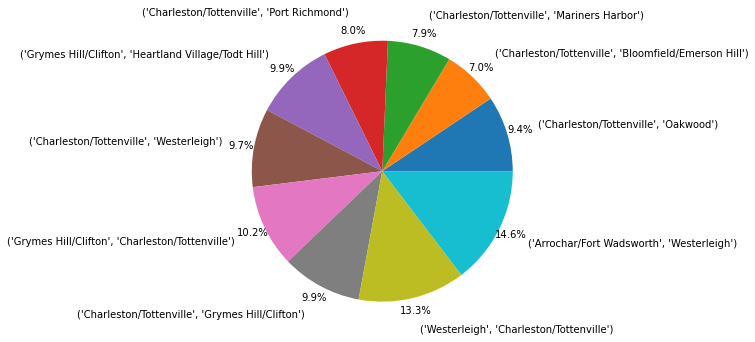

In [19]:
WithinStaten_IslandTopTen=WithinStaten_Island.tail(10)
#plt.figure(figsize=(3,2))
plt.pie(WithinStaten_IslandTopTen,labels=WithinStaten_IslandTopTen.index, radius = 1,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
#print(WithinStaten_IslandTopTen)

#plt.figure(figsize=(3,2))
WithinStaten_Islandmeantopten=WithinStaten_Islandmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinStaten_Islandmeantopten["total_amount"],labels=WithinStaten_Islandmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

#print(WithinStaten_Islandmeantopten)

Staten island should be avoided based on these number.The amount of request are low but if you are lucky you can grab 
shorter trip to earn what appears to be more then normal.

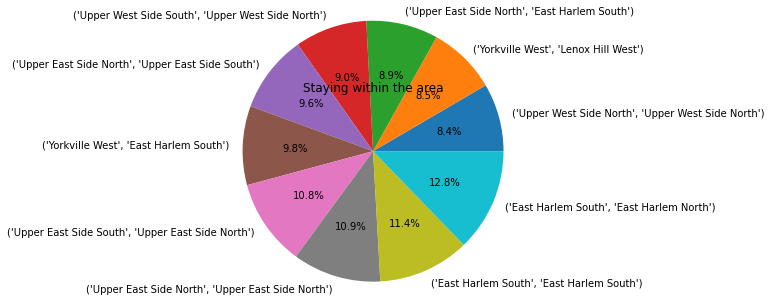

<ipython-input-20-52c8a24b67dc>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


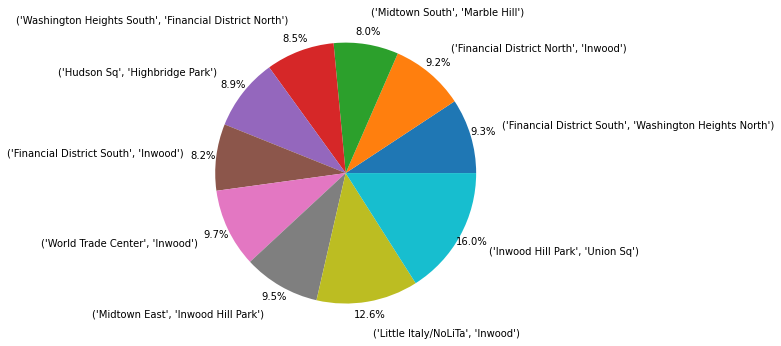

In [20]:
WithinManhattanTopTen=WithinManhattan.tail(10)
plt.figure(figsize=(3,2))
plt.pie(WithinManhattanTopTen,labels=WithinManhattanTopTen.index, radius = 3,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
#print(WithinManhattanTopTen)

WithinManhattanmeantopten=WithinManhattanmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinManhattanmeantopten["total_amount"],labels=WithinManhattanmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

#print(WithinManhattanmeantopten)

My original belief while doing this analysis  was that Mahattan would of been the most overcharge but fell within range to the other borough without any major outliners.

In [21]:
df.head()

,TripStart,TripEnd,Duration,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,TripStart_dayofmonth,TripStart_month,TripStart_year,TripStart_dayofweek,TripStart_week,TripStart_time,TripStart_hourofday,TripStart_minuteofday,TripEnd_dayofmonth,TripEnd_month,TripEnd_year,TripEnd_dayofweek,TripEnd_week,TripEnd_time,TripEnd_hourofday,TripEnd_minuteofday,TripStart_date,TripEnd_date,PickupBorough,PickupZone,DropoffBorough,DropoffZone,Max Temp,Min Temp,Avg Temp,Departure Temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,4/1/2020 0:41,4/1/2020 1:01,20,1,1.20,1,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,1,4,2020,2,14,0:41:00,0,41,1,4,2020,2,14,1:01:00,1,1,4/1/2020 0:00,4/1/2020,Manhattan,Central Harlem,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0.0,0,0
1,4/1/2020 16:59,4/1/2020 17:09,10,1,1.63,1,41,24,2,9.0,1.0,0.5,0.00,0.0,0.3,10.80,0.0,1,4,2020,2,14,16:59:00,16,59,1,4,2020,2,14,17:09:00,17,9,4/1/2020 0:00,4/1/2020,Manhattan,Central Harlem,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0.0,0,0
2,4/1/2020 10:27,4/1/2020 10:44,17,1,4.60,1,68,24,2,16.5,0.0,0.5,0.00,0.0,0.3,19.80,2.5,1,4,2020,2,14,10:27:00,10,27,1,4,2020,2,14,10:44:00,10,44,4/1/2020 0:00,4/1/2020,Manhattan,East Chelsea,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0.0,0,0
3,4/1/2020 12:43,4/1/2020 12:47,4,1,1.30,1,75,24,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0.0,1,4,2020,2,14,12:43:00,12,43,1,4,2020,2,14,12:47:00,12,47,4/1/2020 0:00,4/1/2020,Manhattan,East Harlem South,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0.0,0,0
4,4/1/2020 13:58,4/1/2020 14:10,12,1,1.60,1,75,24,3,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0,1,4,2020,2,14,13:58:00,13,58,1,4,2020,2,14,14:10:00,14,10,4/1/2020 0:00,4/1/2020,Manhattan,East Harlem South,Manhattan,Bloomingdale,56,38,47.0,-0.8,18,0,0.0,0,0


In [22]:
df=pd.read_csv('nyccleaned.csv')
df=df[df['trip_distance']>0]  # Factor out 0 mils travel
df=df[df['total_amount']>0]
df=df[df['payment_type']==1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


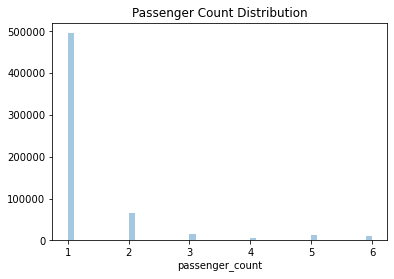

In [23]:
sns.distplot(df['passenger_count'],kde=False)  #Distribution of Passenger count per ride
plt.title('Passenger Count Distribution')
plt.show()

In [24]:
def timezone(x):
    if x>=datetime.time(5, 0, 1) and x <=datetime.time(8, 0, 0):
        return 'Morning'
    if x>=datetime.time(8, 0, 1) and x <=datetime.time(11, 0, 0):
        return 'Rushhour'
    elif x>=datetime.time(11, 0, 1) and x <=datetime.time(13, 0, 0):
        return 'Lunch'
    elif x>=datetime.time(13, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'Afternoon'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(19, 0, 0):
        return 'After_Work'
    elif x>=datetime.time(19, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'Evening'
    elif x>=datetime.time(22, 0, 1) and x <=datetime.time(1, 0, 0):
        return 'Late Evening'
    elif x>=datetime.time(1, 0, 1) or x <=datetime.time(5, 0, 0):
        return 'MidNight'
def distance(x):
    if x>0 and x<=1:
        return 'Short'
    if x>1 and x<=5:
        return 'Regular'
    if x>5 and x<=10:
        return 'Middle'
    if x>10:
        return "Long"
def rain(x):
    if x==0 or x=='T':
        return "No Rain"
    if x>0 and x<0.1:
        return 'Light Rain'
    if x>=0.1 and x<0.3:
        return 'Moderate Rain'
    if x>0.3:
        return 'Heavy Rain'
def temp(x):
    if x<=50:
        return "Cold"
    if x>50 and x<=65:
        return 'Cool'
    if x>65 and x<77:
        return 'Warm'
    if x>=77:
        return 'Hot'

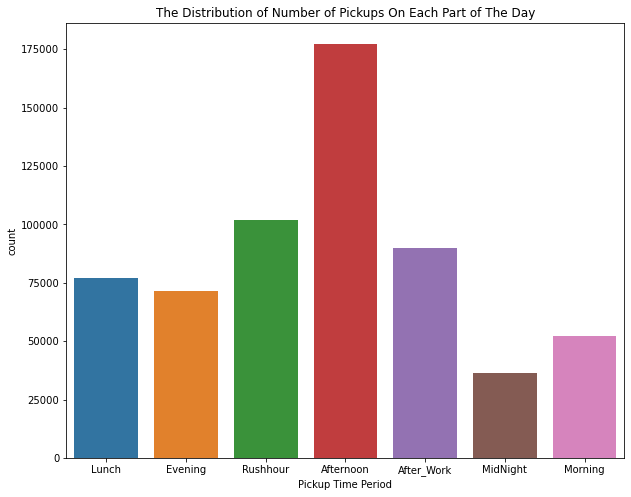

In [25]:
df['Pickup Time Period']=df['TripStart'].apply(lambda x:timezone(datetime.datetime.strptime(str(x), "%m/%d/%Y %H:%M").time()))
fig,axis=plt.subplots(figsize=(10,8))
sns.countplot(x='Pickup Time Period',data=df)       #Group travel count by time of the day
plt.title('The Distribution of Number of Pickups On Each Part of The Day')
plt.xticks()
plt.show()

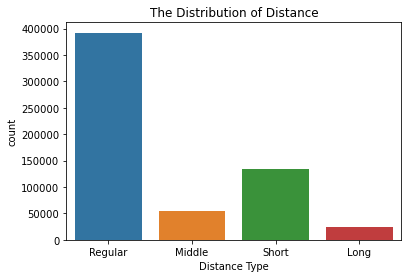

In [26]:
df['Distance Type']=df['trip_distance'].apply(lambda x:distance(x))   #Group distance into separate categories
fig,axis=plt.subplots()
sns.countplot(x='Distance Type',data=df)
plt.title('The Distribution of Distance')
plt.show()

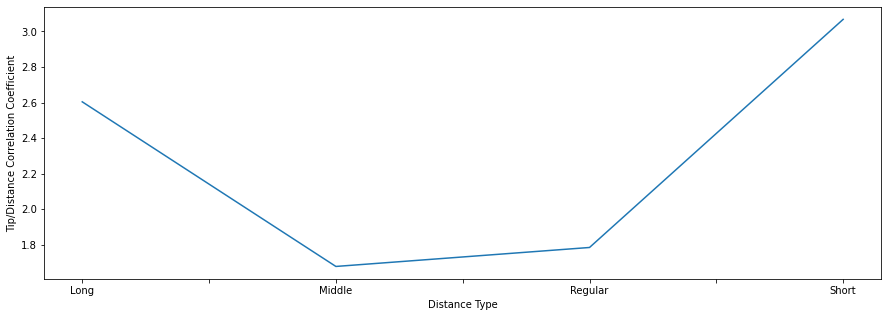

In [27]:
df['Duration_matrix']=(df['trip_distance'])/(df['Duration'])
df=df[df['Duration']>0]
df['tip_rate']=(df['total_amount'])/(df['Duration'])        #Relation between tip and distance
tip_distance=df.groupby(['Distance Type'])['tip_rate'].mean()
b=tip_distance.plot(figsize=(15,5))
b.set_ylabel('Tip/Distance Correlation Coefficient')
plt.show()

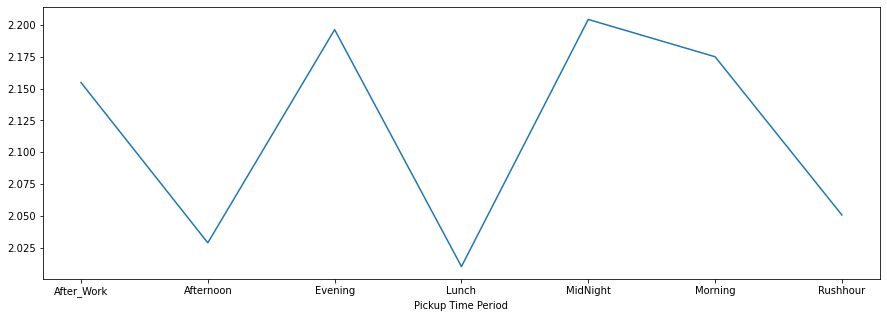

In [28]:
tip_period=df.groupby(['Pickup Time Period'])['tip_rate'].mean()
tip_period.plot(figsize=(15,5))
plt.show()

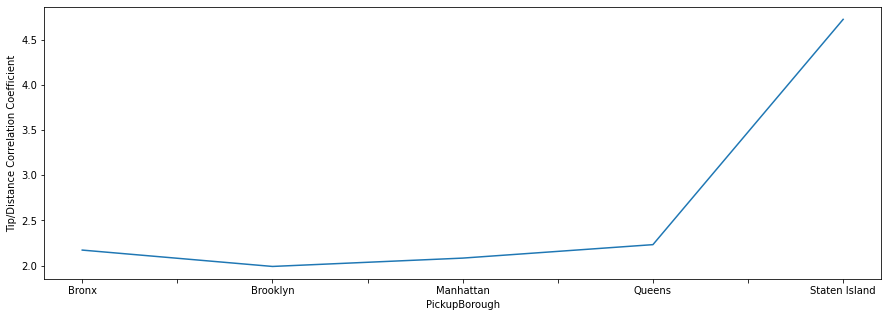

In [29]:
df_location=df[(df['PickupBorough']!='Unknown')&(df['PickupBorough']!='EWR')]    #Factored out Newwark and NV, only 5 Boroughs left
tip_location=df_location.groupby(['PickupBorough'])['tip_rate'].mean()
a=tip_location.plot(figsize=(15,5))
a.set_ylabel('Tip/Distance Correlation Coefficient')
plt.show()

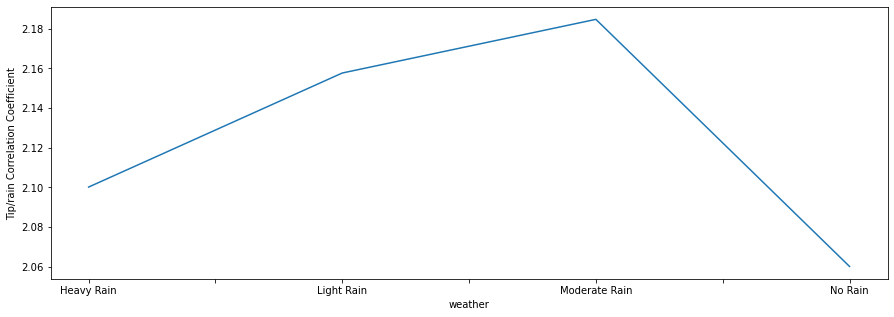

In [30]:
df['weather']=df['Precipitation'].apply(lambda x:rain(x))
tip_weather=df.groupby(['weather'])['tip_rate'].mean()
c=tip_weather.plot(figsize=(15,5))
c.set_ylabel('Tip/rain Correlation Coefficient')
plt.show()

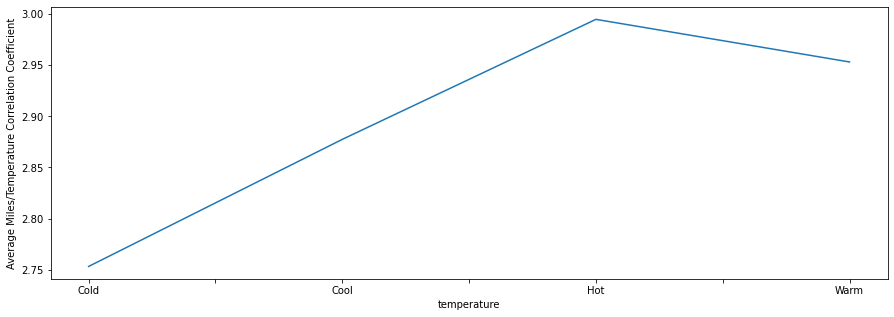

In [31]:
df['temperature']=df['Avg Temp'].apply(lambda x:temp(x))
distance_temperature=df.groupby(['temperature'])['trip_distance'].mean()
d=distance_temperature.plot(figsize=(15,5))
d.set_ylabel('Average Miles/Temperature Correlation Coefficient')
plt.show()

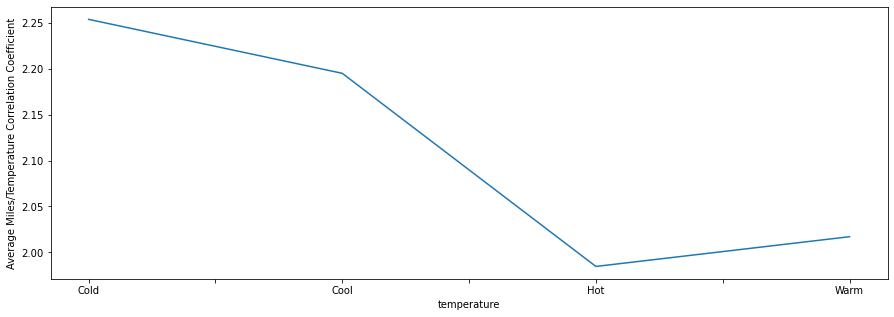

In [32]:
tip_temperature=df.groupby(['temperature'])['tip_rate'].mean()
e=tip_temperature.plot(figsize=(15,5))
e.set_ylabel('Average Miles/Temperature Correlation Coefficient')
plt.show()

Detailed analysis of CASH as mode of payment

In [33]:
# Manhattan Data
Mcash = Manhattan[(Manhattan["payment_type"] == 2)]
Mcash = Mcash[(Mcash["payment_type"] != 3)]
Mcash = Mcash[(Mcash["payment_type"] != 4)]
Mcash = Mcash[(Mcash["payment_type"] != 5)]
Mcash = Mcash[(Mcash["payment_type"] != 6)]


MHT = len(Mcash) / len(Manhattan)
print("The changce of cash payment in Manhattan " + str(MHT))
# count cash payment for Manhattan
CS = Mcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
# count total payment for Manhattan
tt = Manhattan.groupby(["PickupZone"])["trip_distance"].count()
# % of payment use by cash
pct = CS / tt
top = pct.sort_values(ascending=False)
print("Manhattan:")
print(top.head(10))


The changce of cash payment in Manhattan 0.3503943685862098
Manhattan:
payment_type  PickupZone          
2             Highbridge Park         0.600000
              Central Harlem North    0.592574
              East Harlem North       0.591618
              Manhattanville          0.561262
              Hamilton Heights        0.557049
              Marble Hill             0.538462
              Central Harlem          0.529714
              Morningside Heights     0.477534
              East Harlem South       0.476227
              Chinatown               0.475945
Name: trip_distance, dtype: float64


In [34]:
Bxcash = Bronx[(Bronx["payment_type"] == 2)]
Bxcash = Bxcash[(Bxcash["payment_type"] != 3)]
Bxcash = Bxcash[(Bxcash["payment_type"] != 4)]
Bxcash = Bxcash[(Bxcash["payment_type"] != 5)]
Bxcash = Bxcash[(Bxcash["payment_type"] != 6)]

BRX = len(Bxcash) / len(Bronx)
print("The changce of cash payment in Bronx " + str(BRX))

BCS = Bxcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
btt = Bronx.groupby(["PickupZone"])["trip_distance"].count()
bxpct = BCS / btt
BXtop = bxpct.sort_values(ascending=False)
print("Bronx:")
print(BXtop.head(10))

The changce of cash payment in Bronx 0.546480743691899
Bronx:
payment_type  PickupZone                      
2             Fordham South                       0.754098
              Bronx Park                          0.700000
              Melrose South                       0.676123
              Bedford Park                        0.670000
              Mott Haven/Port Morris              0.663176
              West Concourse                      0.652568
              Highbridge                          0.647059
              East Concourse/Concourse Village    0.606707
              Morrisania/Melrose                  0.595376
              Belmont                             0.590164
Name: trip_distance, dtype: float64


In [35]:
Qcash = Queens[(Queens["payment_type"] == 2)]
Qcash = Qcash[(Qcash["payment_type"] != 3)]
Qcash = Qcash[(Qcash["payment_type"] != 4)]
Qcash = Qcash[(Qcash["payment_type"] != 5)]
Qcash = Qcash[(Qcash["payment_type"] != 6)]

QNS = len(Qcash) / len(Queens)
print("The changce of cash payment in Queens " + str(QNS))
QCS = Qcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
qtt = Queens.groupby(["PickupZone"])["trip_distance"].count()
qpct = QCS / qtt
Qtop = qpct.sort_values(ascending=False)
print("Queens:")
print(Qtop.head(10))

The changce of cash payment in Queens 0.585676847092027
Queens:
payment_type  PickupZone                      
2             Forest Park/Highland Park           1.000000
              Long Island City/Hunters Point      0.834297
              Saint Michaels Cemetery/Woodside    0.833333
              Woodside                            0.786280
              Astoria Park                        0.750000
              Sunnyside                           0.698864
              Long Island City/Queens Plaza       0.698343
              Astoria                             0.692308
              Elmhurst                            0.692153
              Old Astoria                         0.673418
Name: trip_distance, dtype: float64


In [36]:
Bkcash = Brooklyn[(Brooklyn["payment_type"] == 2)]
Bkcash = Bkcash[(Bkcash["payment_type"] != 3)]
Bkcash = Bkcash[(Bkcash["payment_type"] != 4)]
Bkcash = Bkcash[(Bkcash["payment_type"] != 5)]
Bkcash = Bkcash[(Bkcash["payment_type"] != 6)]


BK  = len(Bkcash) / len(Brooklyn)
print("The changce of cash payment in Brooklyn " + str(BK))
BKCS = Bkcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
bktt = Brooklyn.groupby(["PickupZone"])["trip_distance"].count()
bkpct = BKCS / bktt
BKtop = bkpct.sort_values(ascending=False)
print("Brooklyn:")
print(BKtop.head(10))

The changce of cash payment in Brooklyn 0.38927657594789483
Brooklyn:
payment_type  PickupZone                     
2             Brighton Beach                     0.650000
              Manhattan Beach                    0.592593
              Carroll Gardens                    0.576087
              Marine Park/Floyd Bennett Field    0.571429
              Williamsburg (South Side)          0.542636
              Fort Greene                        0.524882
              Ocean Parkway South                0.500000
              Bushwick South                     0.497872
              South Williamsburg                 0.485714
              Bedford                            0.482877
Name: trip_distance, dtype: float64


In [37]:
Scash = Staten_Island[(Staten_Island["payment_type"] == 2)]
Scash = Scash[(Scash["payment_type"] != 3)]
Scash = Scash[(Scash["payment_type"] != 4)]
Scash = Scash[(Scash["payment_type"] != 5)]
Scash = Scash[(Scash["payment_type"] != 6)]


SI = len(Scash) / len(Staten_Island)
print("The changce of cash payment in Staten_Island " + str(SI))
SCS = Scash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
stt = Staten_Island.groupby(["PickupZone"])["trip_distance"].count()
spct = SCS / stt
Stop = spct.sort_values(ascending=False)
print("Staten_Island")
print(Stop)

The changce of cash payment in Staten_Island 0.47058823529411764
Staten_Island
payment_type  PickupZone                 
2             West Brighton                  1.000000
              Stapleton                      1.000000
              South Beach/Dongan Hills       1.000000
              Oakwood                        1.000000
              Heartland Village/Todt Hill    1.000000
              Great Kills                    1.000000
              Westerleigh                    0.800000
              Arrochar/Fort Wadsworth        0.500000
              Charleston/Tottenville         0.437500
              New Dorp/Midland Beach         0.375000
              Bloomfield/Emerson Hill        0.333333
              Grymes Hill/Clifton            0.266667
              Mariners Harbor                0.200000
Name: trip_distance, dtype: float64


Define functions to engineer columns into categorical data